## Autoencoders

### Dimensionality reduction

We have explored the concept of dimensionality reduction in previous classes, the main idea behind which is to learn some low-dimensional representation of a data, thereby reducing the features and only retaining some meaningful properties of the original data. We previously covered PCA and kernel PCA techniques for dimensionality reduction tasks, but these tools are limited when we need to learn complex non-linear representations in our data. 
PCA only produces a linear mapping of the data to a lower-dimensional space, which can be overcome by means of the 'kernel trick', which is capable of constructing nonlinear mappings that maximize the variance in the data. Kernel PCA, however, is also limited when dealing with data with large number of features and also in the limitation of number of kernel functions to choose from.

Autoencoders refer to a class of Neural Networks used to learn data representations in an unsupervised manner. The potential of autoencoders resides in their non-linearity, allowing the model to learn more powerful generalizations compared to PCA, and to reconstruct the input with significantly lower information loss.

### Autoencoders as a tool for dimensionality reduction
The hidden layers in a Neural Network can be perceived as lower-dimensional representations of the original input data. The aim is to learn a encoding for a set of data by training the network to ignore signal “noise”. Along with the reduction side, a reconstructing side is learned, where the autoencoder tries to generate from the reduced encoding a representation as close as possible to its original input. In this regard, an autoencoder is constituted by two main parts: an encoder that maps the input into the code, and a decoder that maps the code to a reconstruction of the input.

<img src="autoencoder2.png" width="500">


Autoencoders take any input, chop it into some compressed version, and use that to reconstruct what the input was. So basically, input x goes into hidden layer h, h = f(x), and comes out as reconstruction r, r = g(h). The autoencoder is good when r is close to x, or when the output looks like the input.

A typical autoencoder consists of:

- input data: data that is being encoded and decoded.
- an encoding function: there needs to be a layer (or many layers) that takes an input and encodes it.
- a decoding function: there needs to be a layer(s) that takes the encoded input and decodes it.
- loss function: The autoencoder is good when the output of the decoded version is very close to the original input data (loss is small), and bad when the decoded version looks nothing like the original input.

The simplest form of an autoencoder is a feedforward, non-recurrent neural network similar to single layer perceptrons that participate in multilayer perceptrons (MLP) – employing an input layer and an output layer connected by one or more hidden layers. The output layer has the same number of nodes (neurons) as the input layer. Its purpose is to reconstruct its inputs (minimizing the difference between the input and the output) instead of predicting a target value Y given inputs X.

More on autoencoders: https://www.tensorflow.org/tutorials/generative/autoencoder

https://www.jeremyjordan.me/autoencoders/

### Autoencoders for MNIST data

Let's try using autencoders for dimensionality reduction in MNIST digits data

In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import layers
from keras.datasets import mnist
from sklearn.decomposition import PCA  ## sklearn PCA classes
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from matplotlib  import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Data is comprised of 60,000 training examples and 10,000 test examples of handwritten digits 0–9 with data dimensions (28$\times$28) with 784 features in total per image. we’ll do some basic data preparation so that we can feed it into our neural network as our input set, x.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


Let's build a basic neural network model that gives us hidden layer h from x. We’ll use a single dense hidden layer that takes in x as input with a ReLU activation layer. Size of the hidden layers represents the compression we want in the encoding. Essentially, we reduce our input from (input size) -> size(layer1) -> size(layer2) -> ..., then expand it back up ... -> size(layer3) -> size(layer4) -> 784.

Defining the level of compression of the hidden layer: Basically, as the input is passed through the encoding layer, it will come out smaller if you want it to find salient features. We have 784 features in total, so if we choose 392 for our encoding dimension, there would be a compression factor of 2.

In [ ]:
# size of our encoded representations
encoding_dim = 2  # compression of factor 392, (input size is 784)

In [ ]:
# input size
input_img = Input(shape=(784,))

# encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# reconstruction of the input
# this layer would be the size of the output. We want to generate 28 x 28 pictures in the end, so size is 784
decoded = Dense(784, activation='sigmoid')(encoded)

# putting both layers together into the model
autoencoder = Model(input_img, decoded)

In [ ]:
# model just for encoded representation (encoder)
encoder = Model(input_img, encoded)

# encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
# configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# fit the model for 50 epochs
# should take 1-2 mins

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3889 - val_loss: 0.2803
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2741 - val_loss: 0.2670
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2596 - val_loss: 0.2522
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2507 - val_loss: 0.2477
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2475 - val_loss: 0.2451
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2452 - val_loss: 0.2432
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2435 - val_loss: 0.2415
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2421 - val_loss: 0.2403
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2410 - val_loss: 0.2395
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2401 - val_loss: 0.2386

In [ ]:
# Encode and decode some digits

encoded_imgs = eqcoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

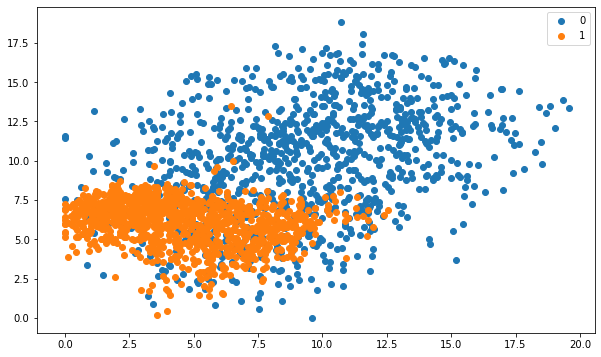

In [ ]:
# plot encodings for two digits

fig, ax = plt.subplots(figsize=(10, 6))

cmap=plt.cm.get_cmap('Spectral')
cmap = cmap(np.linspace(0,1,10))

# for i in range(2, 6):
for i in [0, 1]:
    ax.scatter(encoded_imgs[y_test==i,0],encoded_imgs[y_test==i,1],cmap=cmap[i],label=i)

ax.legend()

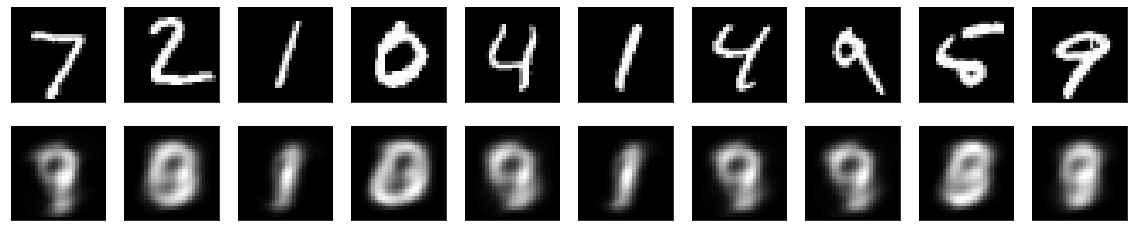

In [ ]:
# let's check the reconstructed images from the autoencoder
# display 10 digits and their reconstruction
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The reconstruction of the digits is very unclear. This is due to the high compression ratio (784 -> 2), the encoder learns a very high level representation of the input images, and hence the data reconstruction is not that good.

Let's fit a model with a relatively lower compression and reconstruct the images.

In [ ]:
encoding_dim = 32 # lets keep the encoding size as 32, a compression factor of 24.5

input_img = Input(shape=(784,))

# encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# reconstruction of the input
# this layer would be the size of the output. We want to generate 28 x 28 pictures in the end, so size is 784
decoded = Dense(784, activation='sigmoid')(encoded)

# putting both layers together into the model
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2767 - val_loss: 0.1900
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1724 - val_loss: 0.1556
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1461 - val_loss: 0.1342
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1282 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1175 - val_loss: 0.1120
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1102 - val_loss: 0.1061
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1052 - val_loss: 0.1021
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1016 - val_loss: 0.0990
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0991 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0973 - val_loss: 0.0953

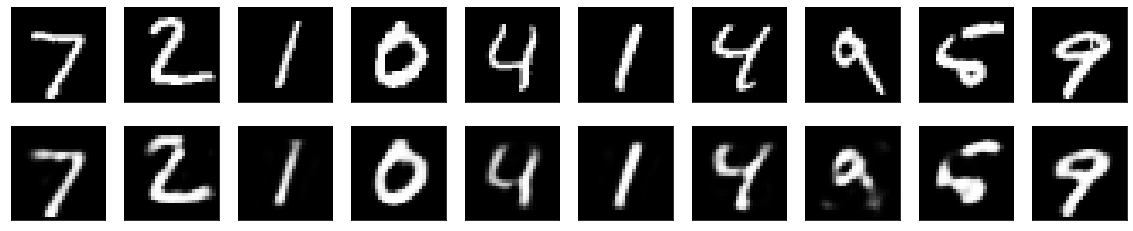

In [ ]:
# Encode and decode some digits

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# display 10 digits and their reconstruction
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Reconstruction is better here with low compression.

## HW task:

Instead of simple NN, use CNN to build a 'convolutional' autoencoder using the same data and report out of sample loss. Also, visualize the first 3 features of encodings as 3D plots for 3 pairs of digits.

Autoencoders can also be implemented with convolutional layers apart from fully connected layers (particularly helpful in grid based data like images). Just like CNNs, we can use Conv2D and MaxPooling2D layers (for spatial down-sampling) here for encoding. Note that encoding layers need to be matched with Conv2D and UpSampling2D (for up-sampling) in the decoding part of the autoencoder.

Use three hidden layers each for encoding and decoding. Use MaxPooling2D layers (for spatial down-sampling) after each hidden layer.  

<img src="flowchart.png" width="300">

So essentially, use 3 stacks of (Conv2D+MaxPooling2D) in the encoder part and (Conv2D+UpSampling2D) for decoder. Take hidden Comv2D layer sizes as (16, (3, 3)) -> (8, (3, 3)) -> (8, (3, 3)) for encoding and decoding. (Both encoder and decoder will consist in 3 stacks each of Conv2D and MaxPooling2D/UpSampling2D layers). The final decoded (output) layer should be a Conv2D layer of (1, (3,3)) dimensions. Use 'sigmoid' activation for final output layer, 'relu' for all others.

Train for 50 epochs

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [4]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 102s 410ms/step - loss: 0.2712 - val_loss: 0.1903
Epoch 2/50
235/235 [==============================] - 91s 388ms/step - loss: 0.1603 - val_loss: 0.1429
Epoch 3/50
235/235 [==============================] - 101s 431ms/step - loss: 0.1381 - val_loss: 0.1325
Epoch 4/50
235/235 [==============================] - 92s 390ms/step - loss: 0.1301 - val_loss: 0.1260
Epoch 5/50
235/235 [==============================] - 92s 393ms/step - loss: 0.1250 - val_loss: 0.1216
Epoch 6/50
235/235 [==============================] - 92s 390ms/step - loss: 0.1213 - val_loss: 0.1185
Epoch 7/50
235/235 [==============================] - 85s 364ms/step - loss: 0.1185 - val_loss: 0.1160
Epoch 8/50
235/235 [==============================] - 85s 363ms/step - loss: 0.1164 - val_loss: 0.1140
Epoch 9/50
235/235 [==============================] - 86s 367ms/step - loss: 0.1144 - val_loss: 0.1125
Epoch 10/50
235/235 [==============================] - 86s 365ms/step -

In [5]:
sample_loss = autoencoder.evaluate(x_test, x_test)
sample_loss

313/313 [==============================] - 5s 15ms/step - loss: 0.0958


0.09578488022089005

In [6]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

313/313 [==============================] - 8s 23ms/step


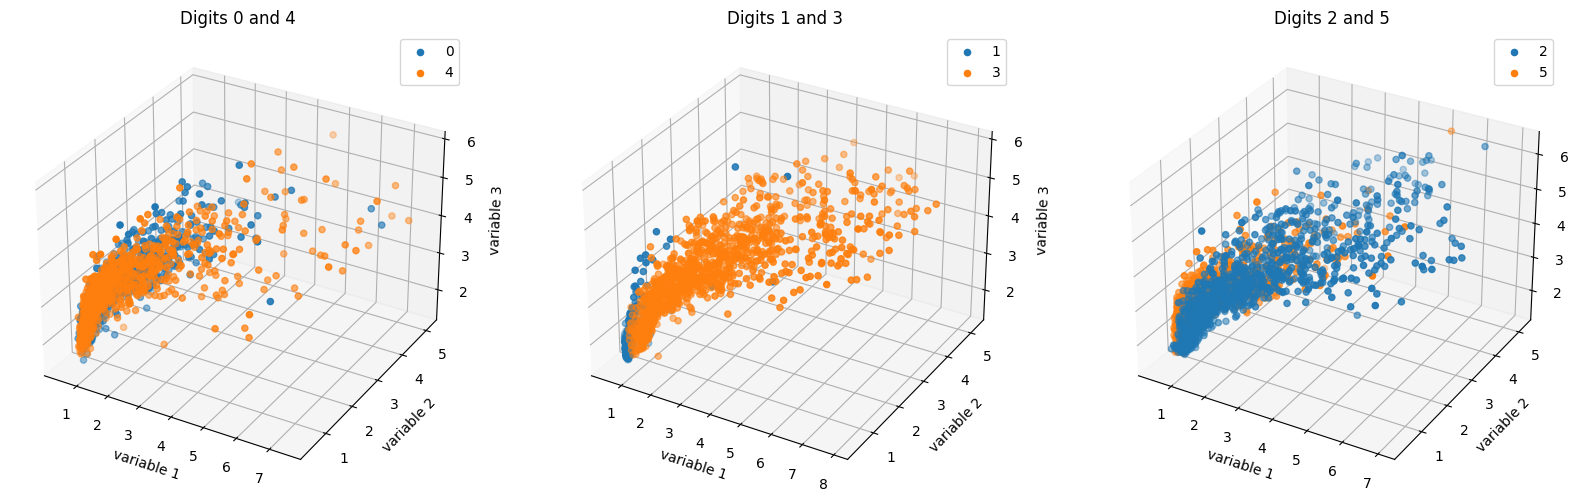

In [8]:
from mpl_toolkits.mplot3d import Axes3D

digit_pairs = [(0, 4), (1, 3), (2, 5)]

fig = plt.figure(figsize=(20, 6))

for idx, pair in enumerate(digit_pairs):
    ax = fig.add_subplot(1, 3, idx + 1, projection='3d')

    for digit in pair:
        mask = y_test == digit
        ax.scatter(encoded_imgs[mask, 0, 0, 0], encoded_imgs[mask, 0, 0, 1], encoded_imgs[mask, 0, 0, 2], label=digit)

    ax.legend()
    ax.set_xlabel('variable 1')
    ax.set_ylabel('variable 2')
    ax.set_zlabel('variable 3')
    ax.set_title(f"Digits {pair[0]} and {pair[1]}")
    
plt.show()